Apresentação

Nome: Luiz Queiroz

Pergunta noteadora: "O que faz um filme ser bem avaliado no Rotten Tomatoes?"

### Abrindo a base de dados

Para iniciarmos a analise, o primeiro passo é conhecer nossa base de dados. Para isso, usaremos a **biblioteca Pandas**, um *conjunto de módulos e funções* criado para manipular e analisar tabelas numéricas e séries temporais.

Iniciaremos com a importação da biblioteca e em seguida utilizando a função "*read_csv*" para ler o arquivo onde estão presentes nossos dados e armazena-lo em um dataframe (*df*).

In [ ]:
import pandas as pd

df = pd.read_csv('./rotten_tomatoes.csv')

### Analise exploratória

Após o armazenamento do arquivo na variável *df*, vamos visualizar algumas informações basicas sobre nosso dataframe, como a quantidade de dados, colunas e tipos de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   modality          20938 non-null  object 
 1   genre             20938 non-null  object 
 2   url               20938 non-null  object 
 3   mined             20938 non-null  object 
 4   title             20890 non-null  object 
 5   tomatometerscore  17866 non-null  float64
 6   tomatometerstate  17984 non-null  object 
 7   audiencescore     19914 non-null  float64
 8   audiencestate     19939 non-null  object 
 9   synopsis          20685 non-null  object 
 10  info              20887 non-null  object 
 11  actor_url         20890 non-null  object 
 12  actor_name        20938 non-null  object 
 13  actor_char        20938 non-null  object 
dtypes: float64(2), object(12)
memory usage: 2.2+ MB


Através da função *info()* sabemos que a base analisada possui *14* colunas e *20.938* linhas. Podemos tirar algumas observações importantes sobre nosso dado, como:
* A quantidade de titulos ser menor que a quantidade total de linhas. Isso implica que *48* registros não possuem título;
* *3.072* registros não possuem nota da crítica;
* *1.024* registros não possuem nota do público;
* *2.954* registros não possuem classificação final;
* *999* não possuem clissificação final do público;
* *253* não possuem sinopse;
* *5*1 não possuem informação adicionais; e
* *48* não possuem a referência dos atores.

Essas informações são necessárias para conhecermos nossa base. O indicativo de registros faltantes pode identificar um erro no processo de preenchimento ou de extração dos dados, sendo um indicador de qualidade dos dados.

Analisaremos agora como os dados são, como estão estruturados e preenchidos. Para isso usaremos a função *display()* para vermos uma prévia do nosso dataframe.

In [ ]:
display(df)

,modality,genre,url,mined,title,tomatometerscore,tomatometerstate,audiencescore,audiencestate,synopsis,info,actor_url,actor_name,actor_char
0,movies_at_home,action,https://www.rottentomatoes.com/m/come_out_figh...,T,COME OUT FIGHTING,NaN,NaN,NaN,NaN,"Set during WWII, in this military adventure, a...","Genre: War, Action\n\nOriginal Language: Engli...",['https://www.rottentomatoes.com/celebrity/kel...,"['Kellan Lutz', 'Hiram A. Murray', 'Dolph Lund...","['Lieutenant Frank Ross', 'Lieutenant Robert A..."
1,movies_at_home,action,https://www.rottentomatoes.com/m/aka,T,AKA,78.0,fresh,79.0,upright,"In this intense action thriller, a special ops...","Genre: Action, Mystery & thriller, Crime, Dram...",['https://www.rottentomatoes.com/celebrity/alb...,"['Alban Lenoir', 'Éric Cantona', 'Thibault de ...","['Adam Franco', '', '', '', '', 'Jonathan', '\..."
2,movies_at_home,action,https://www.rottentomatoes.com/m/the_woman_king,T,THE WOMAN KING,94.0,certified-fresh,99.0,upright,The Woman King is the remarkable story of the ...,Rating: PG-13 (Partial Nudity|Brief Language|S...,['https://www.rottentomatoes.com/celebrity/vio...,"['Viola Davis', 'Thuso Mbedu', 'Lashana Lynch'...","['Nanisca', 'Nawi', 'Izogie', 'Amenza', 'Santo..."
3,movies_at_home,action,https://www.rottentomatoes.com/m/sisu_2022,T,SISU,94.0,certified-fresh,88.0,upright,"During the last desperate days of WWII, a soli...",Rating: R (Strong Bloody Violence|Language|Gor...,['https://www.rottentomatoes.com/celebrity/jor...,"['Jorma Tommila', 'Aksel Hennie', 'Jack Doolan...","['Aatami', 'Bruno', 'Wolf', 'Aino', 'Schütze',..."
4,movies_at_home,action,https://www.rottentomatoes.com/m/polite_society,T,POLITE SOCIETY,91.0,certified-fresh,84.0,upright,"A merry mash-up of sisterly affection, parenta...",Rating: PG-13 (Strong Language|Some Partial Nu...,['https://www.rottentomatoes.com/celebrity/pri...,"['Priya Kansara', 'Ritu Arya', 'Shobu Kapoor',...","['Ria', 'Lena', 'Fatima', 'Alba', 'Clara', 'Ko..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20933,movies_in_theaters,sports,https://www.rottentomatoes.com/m/air_2023,T,AIR,92.0,certified-fresh,98.0,upright,"From award-winning director Ben Affleck, AIR r...","Rating: R (Language)\n\nGenre: Drama, Sports\n...",['https://www.rottentomatoes.com/celebrity/mat...,"['Matt Damon', 'Ben Affleck', 'Jason Bateman',...","['Sonny Vaccaro', 'Phil Knight', 'Rob Strasser..."
20934,movies_in_theaters,sports,https://www.rottentomatoes.com/m/big_george_fo...,T,BIG GEORGE FOREMAN: THE MIRACULOUS STORY OF TH...,44.0,rotten,96.0,upright,Big George Foreman: The Miraculous Story of th...,Rating: PG-13 (Some Sports Violence)\n\nGenre:...,['https://www.rottentomatoes.com/celebrity/khr...,"['Khris Davis', 'Forest Whitaker', 'Jasmine Ma...","['George Foreman', 'Doc Broadus', '', '', '', ..."
20935,movies_in_theaters,war,https://www.rottentomatoes.com/m/come_out_figh...,T,COME OUT FIGHTING,NaN,NaN,50.0,spilled,"Set during WWII, in this military adventure, a...","Genre: War, Action\n\nOriginal Language: Engli...",['https://www.rottentomatoes.com/celebrity/kel...,"['Kellan Lutz', 'Hiram A. Murray', 'Dolph Lund...","['Lieutenant Frank Ross', 'Lieutenant Robert A..."
20936,movies_in_theaters,war,https://www.rottentomatoes.com/m/guy_ritchies_...,T,GUY RITCHIE'S THE COVENANT,83.0,certified-fresh,98.0,upright,Guy Ritchie's The Covenant follows US Army Ser...,Rating: R (Brief Drug Content|Violence|Languag...,['https://www.rottentomatoes.com/celebrity/jak...,"['Jake Gyllenhaal', 'Dar Salim', 'Antony Starr...","['Sergeant John Kinley', 'Ahmed', 'Eddie Parke..."


Analisaremos cada coluna individualmente para que possamos conhecer melhor nossa base. Iniciaremos com a coluna "*Modality*".

<Axes: >

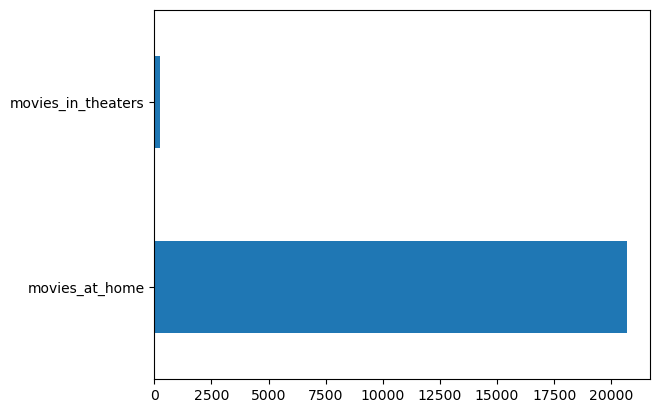

In [ ]:
df['modality'].value_counts().plot(kind='barh')

In [ ]:
df['modality'].value_counts()

movies_at_home        20676
movies_in_theaters      262
Name: modality, dtype: int64

Através da função "*value_counts()*" verificamos que existem apenas duas classificações: *movies_at_home* e *movies_in_theaters*. Essa classificação diz respeito a exibição do filme, caso esteja sendo exibido nos cinemas ou não.

In [ ]:
df['genre'].value_counts()

action                    1983
mystery_and_thriller      1976
documentary               1970
romance                   1963
sci_fi                    1962
musical                   1961
anime                     1958
stand_up                  1305
crime                     1067
adventure                  837
horror                     833
holiday                    826
music                      622
biography                  447
drama                      370
western                    174
lgbtq                      174
sports                     161
history                     92
war                         89
comedy                      86
nature                      23
short                       16
variety                      9
fantasy                      9
special_interest             5
health_and_wellness          3
entertainment                3
animation                    3
reality                      2
news                         2
faith_and_spirituality       2
kids_and

Quanto a coluna de gênero, possuimos 36 classificações onde filmes de ação possuem 1983 registro (aproximadamente 9,5% da base total), enquanto o gênero de viagem, talk show e game show possuem apenas 1 registro, respectivamente.

In [ ]:
df['mined'].value_counts()

T    20890
F       48
Name: mined, dtype: int64

A coluna "mined" apresenta se houve alguma inconsitência na captura da informação. Visualizando apenas os que estão como False, observamos que 48 registros não obtiveram todas as informações capturadas.

In [ ]:
df['tomatometerscore'].value_counts()

100.0    1180
92.0      672
91.0      640
94.0      626
93.0      570
         ... 
4.0        17
7.0        15
14.0       15
3.0         5
2.0         4
Name: tomatometerscore, Length: 99, dtype: int64

Em nossa base de dados, o Tomatometer Score possui uma variação de 100.0 a 2.0, sendo essa a nota baseada na opnião de criticos de cinema e TV.

In [ ]:
df['audiencescore'].value_counts()

91.0    624
90.0    606
86.0    571
87.0    569
85.0    562
       ... 
16.0     12
2.0      10
9.0       7
15.0      3
8.0       1
Name: audiencescore, Length: 93, dtype: int64

Já a Audience Score representa a nota da opnião do público. Em nossa base a maior nota é 100.0 enquanto a menor 2.0.

<Axes: >

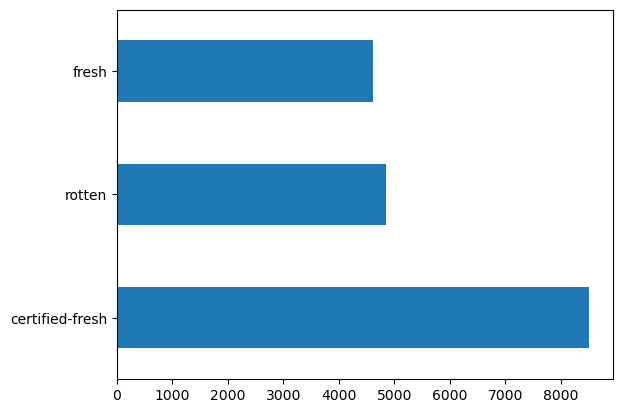

In [ ]:
df['tomatometerstate'].value_counts().plot(kind='barh')

In [ ]:
df['tomatometerstate'].value_counts()

certified-fresh    8517
rotten             4853
fresh              4614
Name: tomatometerstate, dtype: int64

Os status representam a classificação do filme/programa de acordo com a nota recebida pela critica.
- Certified Fresh ocorre quando mais de 75 das criticas são positivas;
- Fresh quando mais que 60% das críticas são positivas;
- Rotten quando menos de 60% das críticas são positivas.

<Axes: >

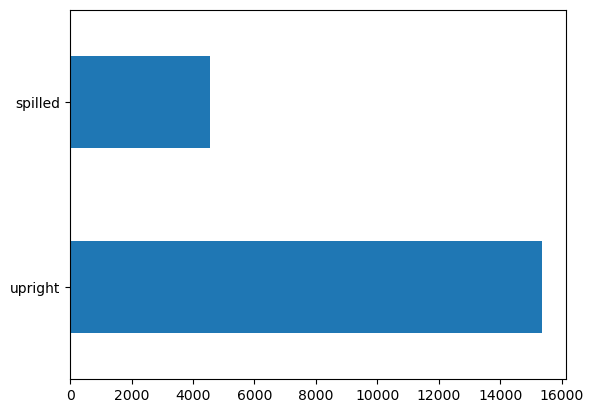

In [ ]:
df['audiencestate'].value_counts().plot(kind='barh')

In [ ]:
df['audiencestate'].value_counts()

upright    15377
spilled     4562
Name: audiencestate, dtype: int64

Já o "audience state" é referente a nota dada pelo público.
- upright: quando mais de 60% das notas são maiores que 3,5 estrelas;
- spilled: quando menos de 60% das notas são maiores que 3,5 estrelas.

In [ ]:
df['info']

0        Genre: War, Action\n\nOriginal Language: Engli...
1        Genre: Action, Mystery & thriller, Crime, Dram...
2        Rating: PG-13 (Partial Nudity|Brief Language|S...
3        Rating: R (Strong Bloody Violence|Language|Gor...
4        Rating: PG-13 (Strong Language|Some Partial Nu...
                               ...                        
20933    Rating: R (Language)\n\nGenre: Drama, Sports\n...
20934    Rating: PG-13 (Some Sports Violence)\n\nGenre:...
20935    Genre: War, Action\n\nOriginal Language: Engli...
20936    Rating: R (Brief Drug Content|Violence|Languag...
20937    Rating: R (Strong Bloody Violence|Language|Gor...
Name: info, Length: 20938, dtype: object

Na coluna "Info", possuimos algumas informações concatenadas. Para realizar uma analise mais acertiva, iremos detalha-la.

Uma caracteristica dessa coluna é que cada propriedade é separada por '\n' contendo um ou mais; e dentro de cada propriedade o valor é separado por ":". Iniciaremos criando um df substituindo os '\n' sucessivos por apenas um. Assim as informações ficarão mais organizadas.

In [ ]:
info = df['info'].str.replace(r'\n *\n', '\n', regex = True)

Em seguida criaremos uma função separa a propriedade do valor através da função "Split", utilizando ":" como separador. Em seguida armazenaremos a propriedade em uma lista.

In [ ]:
def DetalhamentoInfo(x):
    lista = []
    if isinstance(x, list):
        for elemento in x:
            valor = elemento.split(':')[0].strip()
            lista.append(valor)
    return lista


Agora podemos utilizar a função 'split' novamente para separar cada propriedade, resultando em uma lista apenas com as propriedades da coluna Info.

In [ ]:
propriedades_info = list(set(info.str.split('\n').apply(DetalhamentoInfo).sum()))

In [ ]:
propriedades_info

['Release Date (Streaming)',
 'Sound Mix',
 'Production Co',
 'Distributor',
 'Writer',
 'Genre',
 'Box Office (Gross USA)',
 'Producer',
 'Aspect Ratio',
 'Release Date (Theaters)',
 'Original Language',
 'Runtime',
 'View the collection',
 'Rating',
 'Director']

Com as proriedades, podemos obter os valores e então unir ao nosso df original. Para isso criaremos uma função que transforma uma lista em um dicionário e assim organizar cada valor a sua propriedade correta.

In [ ]:
import numpy as np

def ConverteListaParaDicionario(x, propriedade):
    d = {}
    if isinstance(x, list):
        for elemento in x:
            item = elemento.split(':')
            chave = item[0].strip()
            valor = item[1].strip()
            d[chave] = valor

    if propriedade in d:
        return d[propriedade]
    else:
        return np.nan

In [ ]:
for propriedade in propriedades_info:
    df[propriedade] = info.str.split('\n').apply(ConverteListaParaDicionario, args = (propriedade,))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modality                  20938 non-null  object 
 1   genre                     20938 non-null  object 
 2   url                       20938 non-null  object 
 3   mined                     20938 non-null  object 
 4   title                     20890 non-null  object 
 5   tomatometerscore          17866 non-null  float64
 6   tomatometerstate          17984 non-null  object 
 7   audiencescore             19914 non-null  float64
 8   audiencestate             19939 non-null  object 
 9   synopsis                  20685 non-null  object 
 10  info                      20887 non-null  object 
 11  actor_url                 20890 non-null  object 
 12  actor_name                20938 non-null  object 
 13  actor_char                20938 non-null  object 
 14  Releas

Com o detalhamento da coluna "Info" acrescentamos mais 15 colunas ao nosso df

In [ ]:
df['Director'].value_counts()

Michael Bay              139
Christopher Nolan        137
Guy Ritchie              127
Steven Spielberg         124
James Cameron            118
                        ... 
Richard Schenkman          1
James Roday Rodriguez      1
Adam White                 1
Robert Tinnell             1
David Barnard              1
Name: Director, Length: 2240, dtype: int64

In [ ]:
df['Rating'].value_counts()

R                                                                                  938
G                                                                                  579
PG                                                                                 479
TVMA                                                                               322
PG-13                                                                              254
                                                                                  ... 
R (Drug Use|Brief Violence|Language|Sexual Content)                                  1
R (Graphic Nudity|Crude Sexual Content|Language|Pervasive Strong Sexual Conten)      1
R (Brief Nudity|Bloody Images|Language|Violence)                                     1
R (Graphic Sexuality|Brief Language|Some Graphic Nudity)                             1
R (Nudity|Language|Brief Drug Use)                                                   1
Name: Rating, Length: 1433, dtype: int64

In [ ]:
df['Runtime'].value_counts()

1h 30m    583
1h 35m    533
1h 33m    521
1h 45m    510
1h 40m    472
         ... 
22m         1
11m         1
24m         1
9m          1
28m         1
Name: Runtime, Length: 181, dtype: int64

In [ ]:
df['View the collection'].value_counts()

Marvel Cinematic Universe    606
Star Wars Saga               280
The Fast and the Furious     174
DC Universe                  163
Pokémon                      126
Transformers                 118
Halloween                     91
Batman                        81
Jurassic Park                 76
Dragon Ball                   73
Pixar                         70
Terminator                    64
Godzilla                      63
The Hunger Games              53
Alien                         52
Evil Dead                     51
X-Men                         41
James Bond 007                32
Pirates of the Caribbean      30
Predator                      30
Blade Runner                  29
Scream                        29
Planet of the Apes            22
The Conjuring Universe        21
Rocky                         16
Men in Black                  15
Divergent                     11
Sharknado                     11
Indiana Jones                 11
Ocean's                       10
Superman  

In [ ]:
df['Writer'].value_counts()

Chris Morgan                                       97
Christopher Markus, Stephen McFeely                95
Guy Ritchie, Ivan Atkinson, Marn Davies            89
James Gunn                                         85
Alex Garland                                       76
                                                   ..
Dan Schneider, Steven Molaro                        1
Alston Ramsay                                       1
Aileen Hamilton, Lionel Houser, Adele Comandini     1
Jon Schnitzer                                       1
Jac Schaeffer                                       1
Name: Writer, Length: 2462, dtype: int64

In [ ]:
df['Producer'].value_counts()

Kevin Feige                                                   404
James Cameron, Jon Landau                                      87
Don Murphy, Tom DeSanto, Lorenzo di Bonaventura, Ian Bryce     78
Toshio Suzuki                                                  74
Neal H. Moritz, Vin Diesel, Michael Fottrell                   60
                                                             ... 
Nostradamus Brothers                                            1
Rena Mundo Croshere, Nadine Mundo                               1
Sophie Harris                                                   1
Cornelia Principe                                               1
Peter Worsley                                                   1
Name: Producer, Length: 2594, dtype: int64

In [ ]:
df['Box Office (Gross USA)'].value_counts()

$2.0M     70
$2.1M     66
$6.7M     46
$38.5M    46
$4.3M     45
          ..
$97.0M     1
$29.6K     1
$40.1M     1
$15.8M     1
$24.6M     1
Name: Box Office (Gross USA), Length: 1159, dtype: int64

In [ ]:
df['Distributor'].value_counts()

Universal Pictures                   1327
Warner Bros. Pictures                1233
Paramount Pictures                    907
Netflix                               882
20th Century Fox                      788
                                     ... 
ZeeTV                                   1
Lightyear Entertainment                 1
Amazon Studios, Magnolia Pictures       1
Janus Films                             1
Iconic Events                           1
Name: Distributor, Length: 468, dtype: int64

<Axes: >

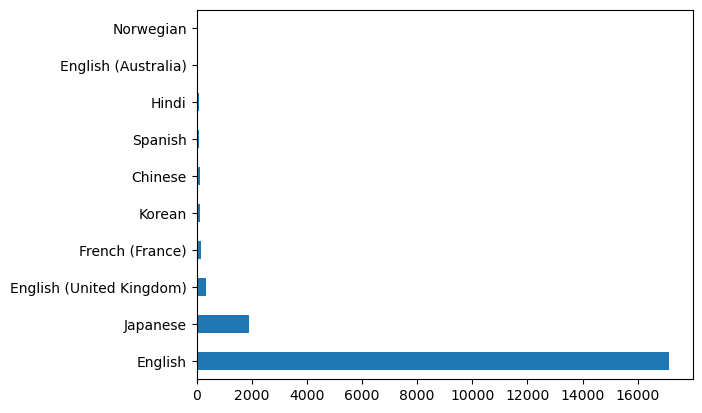

In [ ]:
df['Original Language'].value_counts()[:10].plot(kind='barh')

In [ ]:
df['Original Language'].value_counts()

English                     17135
Japanese                     1892
English (United Kingdom)      334
French (France)               161
Korean                        116
Chinese                       108
Spanish                        92
Hindi                          91
English (Australia)            66
Norwegian                      52
German                         47
Polish                         42
Danish                         41
Italian                        37
Indonesian                     29
Tamil                          28
Portuguese (Brazil)            27
Swedish                        26
Finnish                        24
Persian                        22
Spanish (Spain)                19
Telugu                         18
French (Canada)                18
Russian                        18
Turkish                        17
Dutch                          15
French                         13
Swahili                        13
Greek                          12
Unknown langua

### Hipoteses e comparações

Como vimos na analise exploratória, um filme pode ser bem avaliado tanto pela critica especializada, quanto pelo público geral. Esses indicadores são 'tomatometerscore' e 'audiencescore' respectivamente. Para descobrirmos quais fatores fazem um filme ser bem avaliado, podemos inicialmente buscar uma relação entre essas duas notas. Para isso podemos criar um gráfica de dispersão e verificar o comportamento das duas variáveis.

<Axes: xlabel='tomatometerscore', ylabel='audiencescore'>

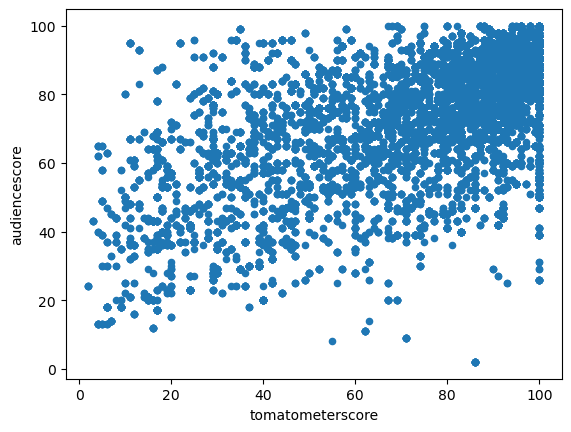

In [ ]:
df.plot(x = 'tomatometerscore', y = 'audiencescore', kind = 'scatter')

É possível observar que no geral a nota da critica e a nota do público seguem uma tendência. Importante notar que apesar de poucos casos também temos situações opostas, onde a crítica entra uma ótima nota enquanto o público não e virce e verso.

Para refinar nossa analise, iremos considerar que filmes/programas bem avaliados possuem nota acima de **90**. Parametro que pode ser alterado posteriormente.

In [ ]:
filmes_bac = df[df['tomatometerscore'] >= 90]
filmes_bap = df[df['audiencescore'] >= 90]

onde:
- filmes_bac = filmes bem avaliados pela critica
- filmes_bap = filmes bem avaliados pelo público

In [ ]:
filmes_bac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 2 to 20937
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modality                  6008 non-null   object 
 1   genre                     6008 non-null   object 
 2   url                       6008 non-null   object 
 3   mined                     6008 non-null   object 
 4   title                     6008 non-null   object 
 5   tomatometerscore          6008 non-null   float64
 6   tomatometerstate          6008 non-null   object 
 7   audiencescore             5905 non-null   float64
 8   audiencestate             5905 non-null   object 
 9   synopsis                  5958 non-null   object 
 10  info                      6008 non-null   object 
 11  actor_url                 6008 non-null   object 
 12  actor_name                6008 non-null   object 
 13  actor_char                6008 non-null   object 
 14  Release

In [ ]:
filmes_bap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3846 entries, 2 to 20936
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modality                  3846 non-null   object 
 1   genre                     3846 non-null   object 
 2   url                       3846 non-null   object 
 3   mined                     3846 non-null   object 
 4   title                     3846 non-null   object 
 5   tomatometerscore          3463 non-null   float64
 6   tomatometerstate          3472 non-null   object 
 7   audiencescore             3846 non-null   float64
 8   audiencestate             3846 non-null   object 
 9   synopsis                  3798 non-null   object 
 10  info                      3846 non-null   object 
 11  actor_url                 3846 non-null   object 
 12  actor_name                3846 non-null   object 
 13  actor_char                3846 non-null   object 
 14  Release

#### Análise de títulos

A primeira hipotese levantada consiste em verificar se o título tem relação com uma boa avaliação. Para isso iremos realizar uma análise quantitiva de palavras dos títulos e então comparar os resultados para cada base (completa, filmes bem avaliados pela critica e bem avaliados pelo público). Para isso criaremos três funções que separam e conta a frequencia de cada palavra.

In [ ]:
def SeparaPalavras(lista_filmes):
    lista_palavras = []
    if isinstance(lista_filmes, list):
        for palavras in lista_filmes:
            lista_palavras.append(palavras)
    return lista_palavras

def DicionarioPalavras(lista_palavras):
    if isinstance(lista_palavras, list):
        frequencia_palavras = [lista_palavras.count(p) for p in lista_palavras]
    return dict(list(zip(lista_palavras, frequencia_palavras)))

def OrdenarDicionario(dicionario):
    if isinstance(dicionario, dict):
        ordenado = [(dicionario[chave], chave) for chave in dicionario]
        ordenado.sort()
        ordenado.reverse()
    return ordenado

Criando uma lista com todas as palavras dos títulos.

In [ ]:
palavras_titulo_geral = list(df['title'].str.lower().str.split().apply(SeparaPalavras).sum())

In [ ]:
palavras_titulo_bac = list(filmes_bac['title'].str.lower().str.split().apply(SeparaPalavras).sum())

In [ ]:
palavras_titulo_bap = list(filmes_bap['title'].str.lower().str.split().apply(SeparaPalavras).sum())

Criando uma lista com as palavras e a frequencia.

In [ ]:
ranking_palavras_geral = OrdenarDicionario(DicionarioPalavras(palavras_titulo_geral))
print(ranking_palavras_geral)

[(7099, 'the'), (2170, 'of'), (936, 'a'), (535, 'and'), (503, 'in'), (459, 'to'), (328, '&'), (327, 'star'), (313, '2'), (312, 'man'), (276, 'i'), (275, 'movie'), (240, 'wars:'), (240, 'story'), (230, 'christmas'), (226, '-'), (225, 'love'), (214, 'my'), (211, 'you'), (207, 'one'), (204, 'movie:'), (202, 'world'), (200, 'on'), (193, 'black'), (183, 'me'), (176, 'last'), (169, 'dark'), (169, 'all'), (166, 'for'), (165, 'night'), (159, 'it'), (156, 'from'), (152, 'king'), (152, 'is'), (144, 'at'), (143, 'with'), (141, 'war'), (136, 'city'), (135, 'episode'), (127, 'time'), (127, 'furious'), (124, 'day'), (120, 'no'), (120, 'fast'), (113, 'john'), (113, 'dragon'), (111, 'dead'), (110, 'your'), (110, 'halloween'), (109, 'little'), (109, '3'), (107, 'new'), (106, 'girl'), (104, 'pokémon'), (103, 'american'), (102, 'out'), (102, 'high'), (102, 'ghost'), (99, 'part'), (98, 'guardians'), (97, 'age'), (96, 'woman'), (96, 'galaxy'), (93, 'naruto'), (88, 'home'), (87, 'rise'), (87, "i'm"), (86, '

In [ ]:
ranking_palavras_bac = OrdenarDicionario(DicionarioPalavras(palavras_titulo_bac))
print(ranking_palavras_bac)

[(2036, 'the'), (639, 'of'), (387, 'a'), (190, 'in'), (133, 'and'), (121, 'star'), (100, 'to'), (96, 'wars:'), (89, 'story'), (86, 'for'), (86, 'all'), (83, 'man'), (82, 'movie'), (74, 'my'), (71, '-'), (69, 'last'), (67, 'is'), (65, 'love'), (65, '&'), (63, 'woman'), (63, 'king'), (61, 'your'), (59, 'with'), (59, 'on'), (59, 'galaxy'), (58, 'everything'), (58, 'dark'), (57, 'i'), (55, 'little'), (55, 'guardians'), (54, 'west'), (53, 'you'), (50, 'at'), (48, 'me'), (47, 'from'), (47, 'before'), (46, 'spider-man:'), (46, 'new'), (46, 'black'), (45, 'la'), (44, 'name'), (44, 'fire'), (43, 'it'), (43, 'ghost'), (43, 'episode'), (42, 'special'), (42, 'one'), (42, 'impossible'), (42, '2'), (41, 'quiet'), (41, 'night'), (41, 'girl'), (40, 'captain'), (39, 'no'), (38, 'train'), (38, 'out'), (38, 'american'), (37, 'terminator'), (37, 'once'), (37, 'christmas'), (36, 'back'), (35, 'side'), (35, 'not'), (34, 'when'), (34, 'mission:'), (34, 'game'), (34, 'attachment'), (33, 'men'), (33, 'day'), (

In [ ]:
ranking_palavras_bap = OrdenarDicionario(DicionarioPalavras(palavras_titulo_bap))
print(ranking_palavras_bap)

[(1430, 'the'), (512, 'of'), (298, 'a'), (109, 'in'), (100, 'movie'), (99, 'and'), (92, 'man'), (85, 'my'), (72, 'story'), (71, 'with'), (70, '&'), (68, '-'), (65, 'star'), (61, 'wars:'), (61, 'episode'), (58, 'king'), (56, 'avengers:'), (54, 'guy'), (51, 'love'), (50, 'new'), (43, 'on'), (42, 'way'), (42, 'to'), (42, "ritchie's"), (42, 'name'), (42, 'covenant'), (42, 'black'), (41, 'woman'), (40, 'your'), (40, 'once'), (39, 'is'), (38, 'mind'), (38, 'aladdin'), (37, 'west'), (36, 'vi'), (36, 'guardians'), (36, 'galaxy'), (36, 'future'), (36, 'back'), (35, 'time'), (35, "i'm"), (35, 'dark'), (34, 'john'), (33, 'water'), (33, 'princess'), (33, 'avatar:'), (32, 'you'), (32, 'me'), (31, 'spider-man:'), (31, 'from'), (31, 'dune'), (30, 'sing'), (30, 'quiet'), (30, 'how'), (29, 'world'), (29, 'war'), (29, 'endgame'), (29, 'dave'), (28, 'v'), (28, "marvel's"), (28, 'knight'), (28, 'inception'), (28, 'ii'), (28, 'eternal'), (28, 'avengers'), (27, 'wind'), (27, 'side'), (27, 'kid'), (27, 'infi

No resultado acima, é possívle notar que as primeiras posições de palavras com maior frequencia são as chamadas "stopwords". Para melhorar nossa análise, iremos retira-las.

In [ ]:
def removerStopwords(lista_palavras, stopwords):
    return [p for p in lista_palavras if p not in stopwords]

In [ ]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves', '&', '-']

In [ ]:
ranking_palavras_geral = OrdenarDicionario(DicionarioPalavras(removerStopwords(palavras_titulo_geral, stopwords)))
for i in ranking_palavras_geral:
    print(i)

(327, 'star')
(313, '2')
(312, 'man')
(275, 'movie')
(240, 'wars:')
(240, 'story')
(230, 'christmas')
(225, 'love')
(204, 'movie:')
(202, 'world')
(193, 'black')
(169, 'dark')
(165, 'night')
(152, 'king')
(141, 'war')
(136, 'city')
(135, 'episode')
(127, 'time')
(127, 'furious')
(124, 'day')
(120, 'fast')
(113, 'john')
(113, 'dragon')
(111, 'dead')
(110, 'halloween')
(109, 'little')
(109, '3')
(107, 'new')
(106, 'girl')
(104, 'pokémon')
(103, 'american')
(102, 'high')
(102, 'ghost')
(98, 'guardians')
(97, 'age')
(96, 'woman')
(96, 'galaxy')
(93, 'naruto')
(88, 'home')
(87, 'rise')
(87, "i'm")
(86, 'seven')
(85, 'way')
(84, 'jurassic')
(84, 'big')
(83, 'days')
(82, 'blue')
(80, 'captain')
(79, 'avengers:')
(78, 'mystery')
(78, 'legend')
(77, 'wars')
(77, 'musical')
(77, 'lost')
(77, 'ii')
(73, 'summer')
(73, 'princess')
(73, 'men')
(73, 'infinity')
(73, 'iii')
(72, 'phantom')
(72, 'life')
(72, 'evil')
(71, 'transformers:')
(71, 'perfect')
(70, 'water')
(70, 'ball')
(69, 'house')
(69, 'g

In [ ]:
ranking_palavras_critica = OrdenarDicionario(DicionarioPalavras(removerStopwords(palavras_titulo_bac, stopwords)))
for i in ranking_palavras_critica:
    print(i)

(121, 'star')
(96, 'wars:')
(89, 'story')
(83, 'man')
(82, 'movie')
(65, 'love')
(63, 'woman')
(63, 'king')
(59, 'galaxy')
(58, 'dark')
(55, 'little')
(55, 'guardians')
(54, 'west')
(46, 'spider-man:')
(46, 'new')
(46, 'black')
(45, 'la')
(43, 'ghost')
(43, 'episode')
(42, 'special')
(42, 'impossible')
(42, '2')
(41, 'quiet')
(41, 'night')
(41, 'girl')
(40, 'captain')
(38, 'train')
(38, 'american')
(37, 'terminator')
(37, 'christmas')
(34, 'mission:')
(34, 'game')
(34, 'attachment')
(33, 'men')
(33, 'day')
(31, 'mind')
(30, 'old')
(30, 'm3gan')
(30, 'iron')
(30, 'high')
(30, 'hell')
(30, 'hannah')
(30, 'gadsby:')
(29, 'water')
(29, 'guys')
(29, 'endgame')
(29, 'boys')
(29, 'avengers:')
(28, 'war')
(28, 'v')
(28, "marvel's")
(28, 'eternal')
(28, 'avengers')
(27, 'jurassic')
(27, 'jedi')
(27, 'away')
(26, 'robin')
(26, 'princess')
(26, 'force')
(26, 'city')
(26, 'bone')
(26, 'big')
(26, 'baby')
(26, 'awakens')
(26, 'america:')
(25, 'time')
(25, 'richard:')
(25, 'movie:')
(25, 'endless')


In [ ]:
ranking_palavras_publico = OrdenarDicionario(DicionarioPalavras(removerStopwords(palavras_titulo_bap, stopwords)))
for i in ranking_palavras_publico:
    print(i)

(100, 'movie')
(92, 'man')
(72, 'story')
(65, 'star')
(61, 'wars:')
(61, 'episode')
(58, 'king')
(56, 'avengers:')
(54, 'guy')
(51, 'love')
(50, 'new')
(42, 'way')
(42, "ritchie's")
(42, 'covenant')
(42, 'black')
(41, 'woman')
(38, 'mind')
(38, 'aladdin')
(37, 'west')
(36, 'vi')
(36, 'guardians')
(36, 'galaxy')
(36, 'future')
(35, 'time')
(35, "i'm")
(35, 'dark')
(34, 'john')
(33, 'water')
(33, 'princess')
(33, 'avatar:')
(31, 'spider-man:')
(31, 'dune')
(30, 'sing')
(30, 'quiet')
(29, 'world')
(29, 'war')
(29, 'endgame')
(29, 'dave')
(28, 'v')
(28, "marvel's")
(28, 'knight')
(28, 'inception')
(28, 'ii')
(28, 'eternal')
(28, 'avengers')
(27, 'wind')
(27, 'kid')
(27, 'infinity')
(26, 'wrath')
(26, 'plane')
(25, 'nate')
(25, 'mulaney:')
(25, 'legend')
(25, 'iron')
(25, 'george')
(25, 'castle')
(25, 'bargatze:')
(24, 'thieves')
(24, 'night')
(24, 'honor')
(24, 'hero')
(24, 'dungeons')
(24, 'dragons:')
(23, 'free')
(23, 'big')
(23, 'away')
(22, 'valley')
(22, 'movie:')
(22, 'iv')
(22, 'hop

Ao comparar os resultados, temos que na base completa as palavras que mais se repetem são:
- Star: 327;
- 2: 313;
- Man: 312;
- Movie: 275;
- Wars: 240;
- Story: 240;
- Chistmas: 230;
- Love: 225;
- World: 202;
- Black: 193

Já os filmes com melhor avaliação da critica, as palavras que mais aparecem nos títulos são:
- Star: 121;
- Wars: 96;
- Story: 89;
- Man: 83;
- Movie: 82;
- Love: 65;
- Woman: 63;
- King: 63;
- Galaxy: 59;
- Dark: 58

Para os melhores avaliados do público:
- Movie: 100;
- Man: 92;
- Story: 72;
- Star: 65;
- Wars: 61;
- Episode: 61;
- King: 58;
- Avenger: 56;
- Guy: 54;
- Love: 51

Entre os três resultados é possível notar uma maior frequencia das palavras "Movie", "Star", "Wars", "Man", "Story", "Love", mas quando olhamos apenas para os melhores avaliados pela crítica, surgem palavras novas, como: "Woman", "King", "Galaxy" e "dark". Já os melhores avaliados pelo público, encontramos: "Episode", "King", "Avenger" e "Guy".

#### Analise de genero

<Axes: >

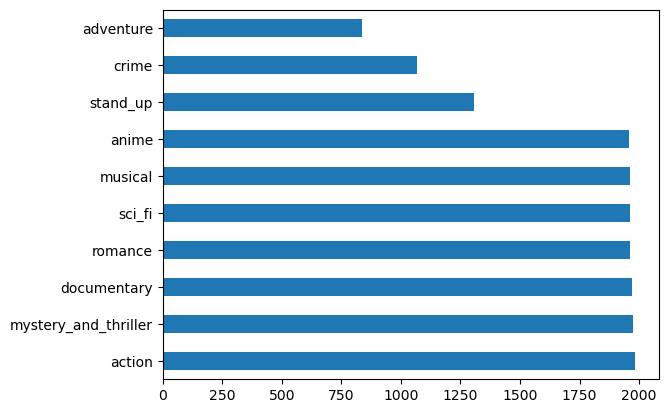

In [ ]:
df['genre'].value_counts()[:10].plot(kind='barh')

In [ ]:
df['genre'].value_counts()

action                    1983
mystery_and_thriller      1976
documentary               1970
romance                   1963
sci_fi                    1962
musical                   1961
anime                     1958
stand_up                  1305
crime                     1067
adventure                  837
horror                     833
holiday                    826
music                      622
biography                  447
drama                      370
western                    174
lgbtq                      174
sports                     161
history                     92
war                         89
comedy                      86
nature                      23
short                       16
variety                      9
fantasy                      9
special_interest             5
health_and_wellness          3
entertainment                3
animation                    3
reality                      2
news                         2
faith_and_spirituality       2
kids_and

<Axes: >

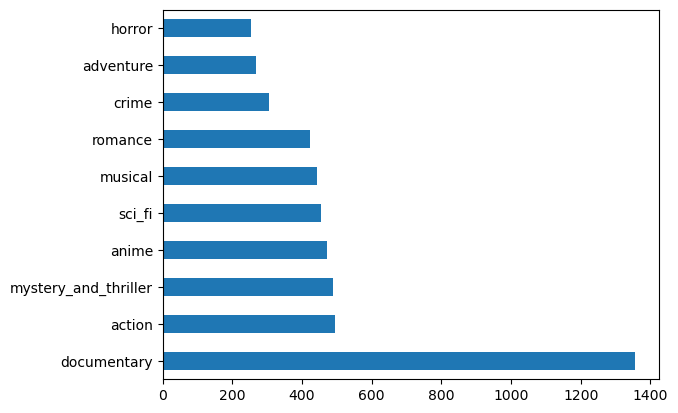

In [ ]:
filmes_bac['genre'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bac['genre'].value_counts()

documentary             1356
action                   494
mystery_and_thriller     490
anime                    471
sci_fi                   455
musical                  442
romance                  424
crime                    305
adventure                269
horror                   252
stand_up                 233
music                    216
biography                120
holiday                  106
drama                    104
lgbtq                     71
western                   60
sports                    40
history                   33
war                       31
comedy                    23
nature                     6
short                      2
special_interest           2
health_and_wellness        1
news                       1
fantasy                    1
Name: genre, dtype: int64

<Axes: >

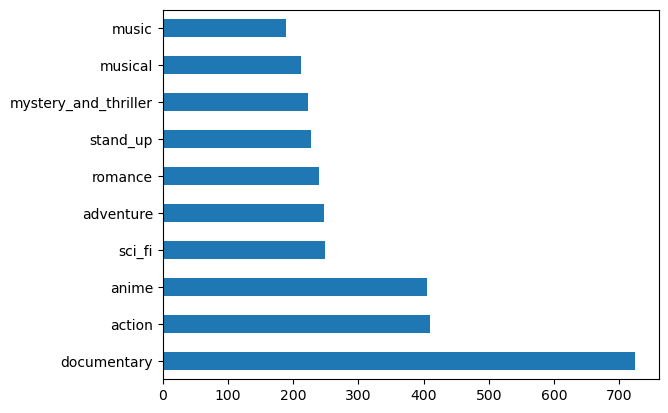

In [ ]:
filmes_bap['genre'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bap['genre'].value_counts()

documentary               724
action                    409
anime                     405
sci_fi                    249
adventure                 247
romance                   240
stand_up                  228
mystery_and_thriller      223
musical                   212
music                     189
crime                     168
biography                 129
drama                     102
holiday                    59
horror                     44
western                    43
sports                     39
history                    33
lgbtq                      31
comedy                     29
war                        27
nature                      6
fantasy                     3
special_interest            2
animation                   1
short                       1
variety                     1
faith_and_spirituality      1
kids_and_family             1
Name: genre, dtype: int64

Tanto em quantidade geral, quanto no filmes mais bem avaliados é possível notar uma grande presença do genero Documentário, Ação, Anime e Ficção Cientifica. Já de forma individual o genero Misterio e Terror se destaca em nota da critica, enquanto o genero de Aventura se destaca para o publico geral.

#### Valor de bilheteria

<Axes: xlabel='tomatometerscore', ylabel='Box Office (Gross USA)_Float'>

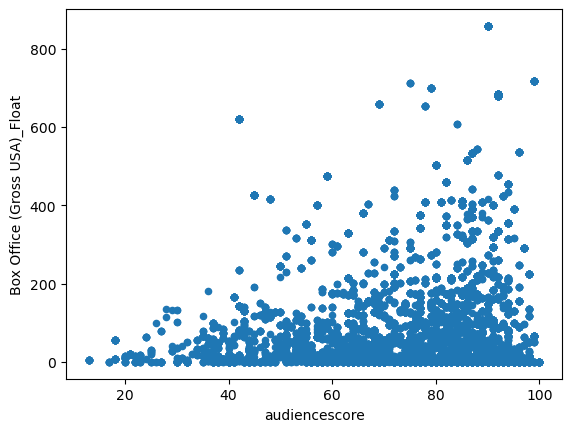

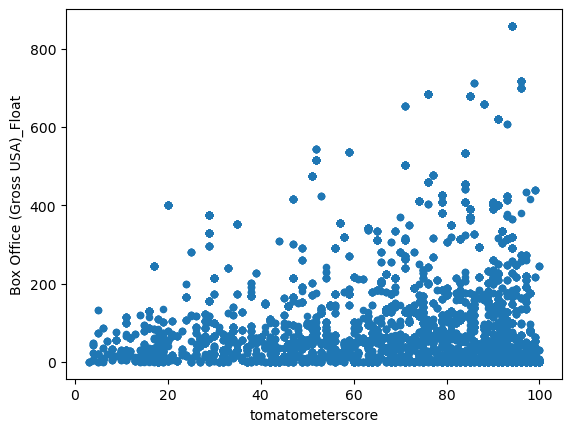

In [ ]:
def TransformaValores(x):
    if isinstance(x,str):
        return eval(x)/1000000
    else:
        return np.nan

bilheteria = df['Box Office (Gross USA)'].str.replace(r'$', '', regex = True).str.replace(r'M', '*1000000').str.replace(r'K','*1000')

df['Box Office (Gross USA)_Float'] = bilheteria.apply(TransformaValores)

df.plot(y = 'Box Office (Gross USA)_Float', x = 'audiencescore', kind = 'scatter')
df.plot(y = 'Box Office (Gross USA)_Float', x = 'tomatometerscore', kind = 'scatter')

Não é possível tirar decisões conclusivas exata sobre esse indicador. Apesar de notarmos uma parcela de filmes com alta bilheteria possuirem notas altas tanto do público quanto da critica, grande parcela das

#### Diretor

<Axes: >

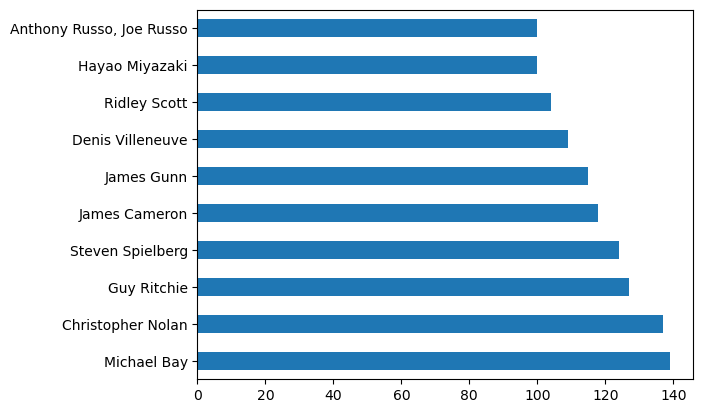

In [ ]:
df['Director'].value_counts()[:10].plot(kind='barh')

In [ ]:
df['Director'].value_counts()

Michael Bay              139
Christopher Nolan        137
Guy Ritchie              127
Steven Spielberg         124
James Cameron            118
                        ... 
Richard Schenkman          1
James Roday Rodriguez      1
Adam White                 1
Robert Tinnell             1
David Barnard              1
Name: Director, Length: 2240, dtype: int64

<Axes: >

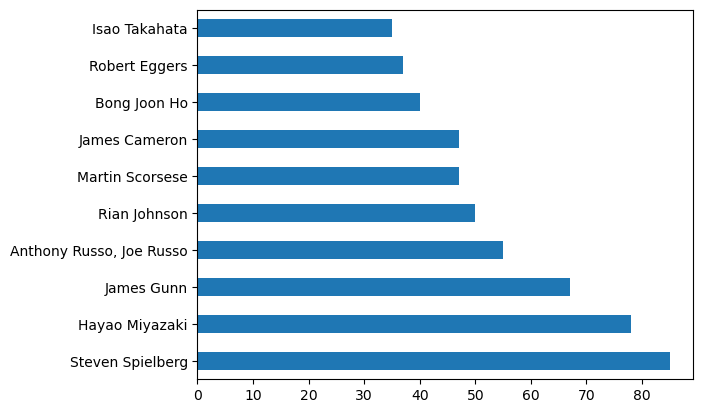

In [ ]:
filmes_bac['Director'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bac['Director'].value_counts()

Steven Spielberg            85
Hayao Miyazaki              78
James Gunn                  67
Anthony Russo, Joe Russo    55
Rian Johnson                50
                            ..
David Swift                  1
Christo Brock                1
Scott Gawlik                 1
Jamin Winans                 1
Orit Fouks Rotem             1
Name: Director, Length: 718, dtype: int64

<Axes: >

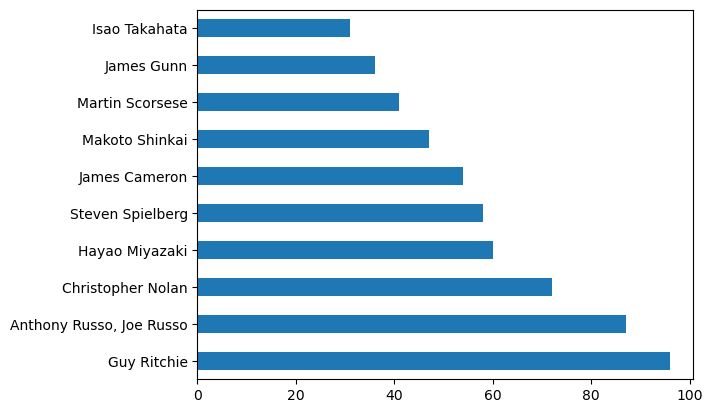

In [ ]:
filmes_bap['Director'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bap['Director'].value_counts()

Guy Ritchie                          96
Anthony Russo, Joe Russo             87
Christopher Nolan                    72
Hayao Miyazaki                       60
Steven Spielberg                     58
                                     ..
Chad Hartigan                         1
Jimmy T. Murakami, Dianne Jackson     1
Chris Howe                            1
Elem Klimov                           1
Adam Saunders                         1
Name: Director, Length: 438, dtype: int64

Quando verificamos a presença de diretores em nossa base geral e nos filmes melhores avaliados, percebemos alguns comportamentos importante. Como interseção dos filmes melhores avaliados, temos Steven Spielberg, Hayao Miyazaki, Anthony Russo, Joe Russo  conquistanto boas notas tanto da critica, quanto do publico. Enquanto Steven Spielberg possui a maior quantidade de filmes com notas boas da critica, Guy Ritchie possui boas avaliações do publico.

#### Duração do filme

In [ ]:
df['Runtime']

0        1h 25m
1         2h 3m
2        2h 15m
3        1h 31m
4        1h 43m
          ...  
20933    1h 52m
20934     2h 9m
20935    1h 25m
20936     2h 3m
20937    1h 31m
Name: Runtime, Length: 20938, dtype: object

In [ ]:
duracao = df['Runtime'].str.replace('h', '*60+').str.replace('m', '*1')

In [ ]:
df['Runtime'] = duracao.apply(TransformaValores)

In [ ]:
df['Runtime'].describe()

count    20563.000000
mean         0.000109
std          0.000026
min          0.000003
25%          0.000093
50%          0.000107
75%          0.000123
max          0.000561
Name: Runtime, dtype: float64

<Axes: xlabel='tomatometerscore', ylabel='Runtime'>

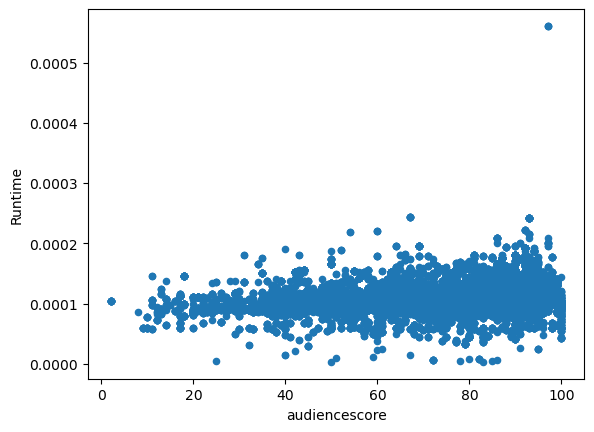

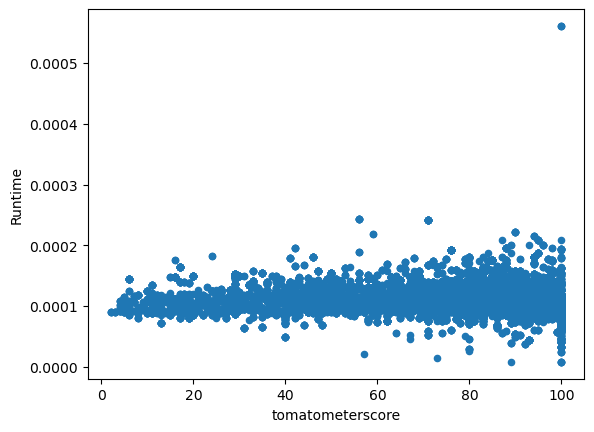

In [ ]:
df.plot(y = 'Runtime', x = 'audiencescore', kind = 'scatter')
df.plot(y = 'Runtime', x = 'tomatometerscore', kind = 'scatter')

É possíve notar uma tendência média de duração de 108 minutos para a produção de filmes, mas quando observamos as notas da critica e do público, não é possível chegar a um valor definitivo, visto que há muita variação de nota e duração dos filmes.

#### Roteirista

<Axes: >

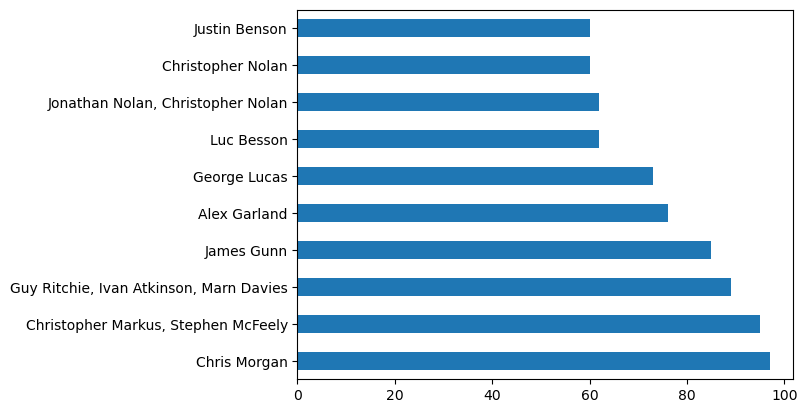

In [ ]:
df['Writer'].value_counts()[:10].plot(kind='barh')

In [ ]:
df['Writer'].value_counts()

Chris Morgan                                       97
Christopher Markus, Stephen McFeely                95
Guy Ritchie, Ivan Atkinson, Marn Davies            89
James Gunn                                         85
Alex Garland                                       76
                                                   ..
Dan Schneider, Steven Molaro                        1
Alston Ramsay                                       1
Aileen Hamilton, Lionel Houser, Adele Comandini     1
Jon Schnitzer                                       1
Jac Schaeffer                                       1
Name: Writer, Length: 2462, dtype: int64

<Axes: >

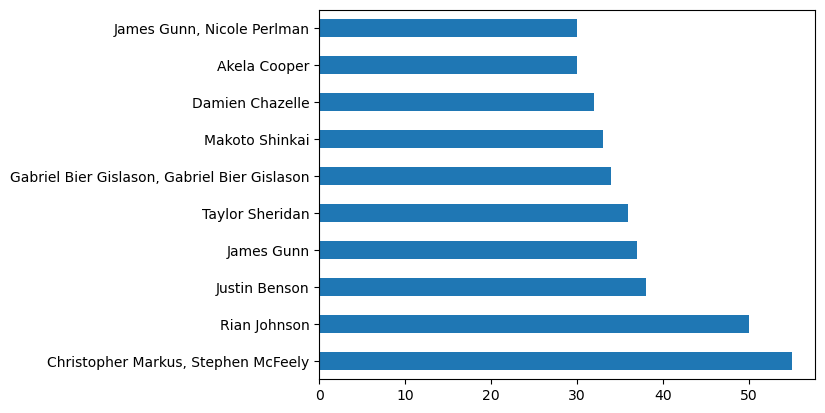

In [ ]:
filmes_bac['Writer'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bac['Writer'].value_counts()

Christopher Markus, Stephen McFeely               55
Rian Johnson                                      50
Justin Benson                                     38
James Gunn                                        37
Taylor Sheridan                                   36
                                                  ..
Christopher Bram, Bill Condon                      1
Lisa Cholodenko, Stuart Blumberg                   1
Dustin Lance Black                                 1
Akira Kurosawa, Shinobu Hashimoto, Hideo Oguni     1
Orit Fouks Rotem                                   1
Name: Writer, Length: 673, dtype: int64

<Axes: >

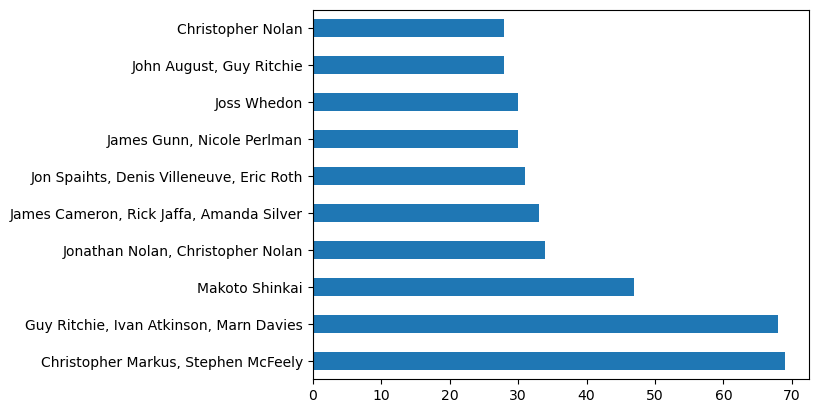

In [ ]:
filmes_bap['Writer'].value_counts()[:10].plot(kind='barh')

In [ ]:
filmes_bap['Writer'].value_counts()

Christopher Markus, Stephen McFeely         69
Guy Ritchie, Ivan Atkinson, Marn Davies     68
Makoto Shinkai                              47
Jonathan Nolan, Christopher Nolan           34
James Cameron, Rick Jaffa, Amanda Silver    33
                                            ..
Raymond Briggs                               1
Matt Whitaker, Cathy Lew                     1
Ales Adamovich, Elem Klimov                  1
Guillermo del Toro                           1
Edwin Torres, David Koepp                    1
Name: Writer, Length: 398, dtype: int64

Quando verificamos variação de roteiristas com as notas da critica e do publico, notamos que apenas Christopher Markus e Stephen McFeely estão em interseção para os dois grupos, possuindo a maior quantidade de notas em ambos. Porém o restante da lista possui nomes diversos.

### Conclusão

Relação entre notas: É possível notar uma tendência linear entre a nota da critica e a nota do público, possuindo alguns poucos outliers onde as notas são inversas.

Há mais filmes bem avaliados pela critica do que bem avaliados pelo público.

Avaliação de palavras do títulos: Entre os três resultados é possível notar uma maior frequencia das palavras "Movie", "Star", "Wars", "Man", "Story", "Love", mas quando olhamos apenas para os melhores avaliados pela crítica, surgem palavras novas, como: "Woman", "King", "Galaxy" e "dark". Já os melhores avaliados pelo público, encontramos: "Episode", "King", "Avenger" e "Guy".

Genero: Tanto em quantidade geral, quanto no filmes mais bem avaliados é possível notar uma grande presença do genero Documentário, Ação, Anime e Ficção Cientifica. Já de forma individual o genero Misterio e Terror se destaca em nota da critica, enquanto o genero de Aventura se destaca para o publico geral.

Valor de bilheteria: Não é possível tirar decisões conclusivas exata sobre esse indicador. Apesar de notarmos uma parcela de filmes com alta bilheteria possuirem notas altas tanto do público quanto da critica, grande parcela das

Diretor: Quando verificamos a presença de diretores em nossa base geral e nos filmes melhores avaliados, percebemos alguns comportamentos importante. Como interseção dos filmes melhores avaliados, temos Steven Spielberg, Hayao Miyazaki, Anthony Russo, Joe Russo  conquistanto boas notas tanto da critica, quanto do publico. Enquanto Steven Spielberg possui a maior quantidade de filmes com notas boas da critica, Guy Ritchie possui boas avaliações do publico.

É possíve notar uma tendência média de duração de 108 minutos para a produção de filmes, mas quando observamos as notas da critica e do público, não é possível chegar a um valor definitivo, visto que há muita variação de nota e duração dos filmes.

Quando verificamos variação de roteiristas com as notas da critica e do publico, notamos que apenas Christopher Markus e Stephen McFeely estão em interseção para os dois grupos, possuindo a maior quantidade de notas em ambos. Porém o restante da lista possui nomes diversos.